## Introduction
  
`Nama    : Ridzki Darykholaf Hendriansyah `
  
`Batch   : 009`
  
In this case, I will to make Neoral Network Model

## About Dataset
> Context
  
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
> Content
  
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and 
  
> Inspiration
  
To explore this type of models and learn more about the subject.

New version from [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
  





## Assignment Objectives
Milestones 1 was created to develop Phase 2 Learning:
- Able to understand the concept of Artificial Neural Networks.
- Capable of preparing data for use in the Neural Network model.
- Able to implement Artificial Neural Networks with the given data.
- Able to analyze and explain the created layer.



## What is that!
> Neural Networks
  
  Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another. [From](https://www.ibm.com/cloud/learn/neural-networks)

## Import Libraries
In this case I will to import all library used for this dataset

In [1]:
#untuk EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

#untuk preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.preprocessing import  StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


#untuk model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

import warnings
warnings.filterwarnings("ignore")

## Data loading
>his section contains the data preparation process before further data exploration is carried out. The Data Loading process can be in the form of giving a new name for each column, checking the size of the dataset, etc.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', None)
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I want to copy the dataset

In [4]:
df_copy = df.copy() #Copying dataset

## Exploratory Data Analysis (EDA)
This section contains the exploration of the dataset above using queries, grouping, simple visualization, etc



In [5]:
#For know shape of dataset

df.shape

(7043, 21)

This dataset have 7043 entry data and have 21 column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I see a mistake for type of data in colomn `TotalCharge`, I see in dataset is int but in `df.info` was object, I want to check that column

In [7]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Look at the result, we can see the `space` is value, we can change that to the NaN and than we can drop that 

In [8]:
df = df.replace(' ', np.nan).dropna() #Replace space with NaN and drop NaN

In [9]:
df['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

That `space` already dropped

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


But, type data for column `TotalCharges` still `object`, i will to change that to numeric

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges) #change type data for column TotalCharge

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


type data for column `TotalCharge` already change to `float64` 

In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset haven't missing value

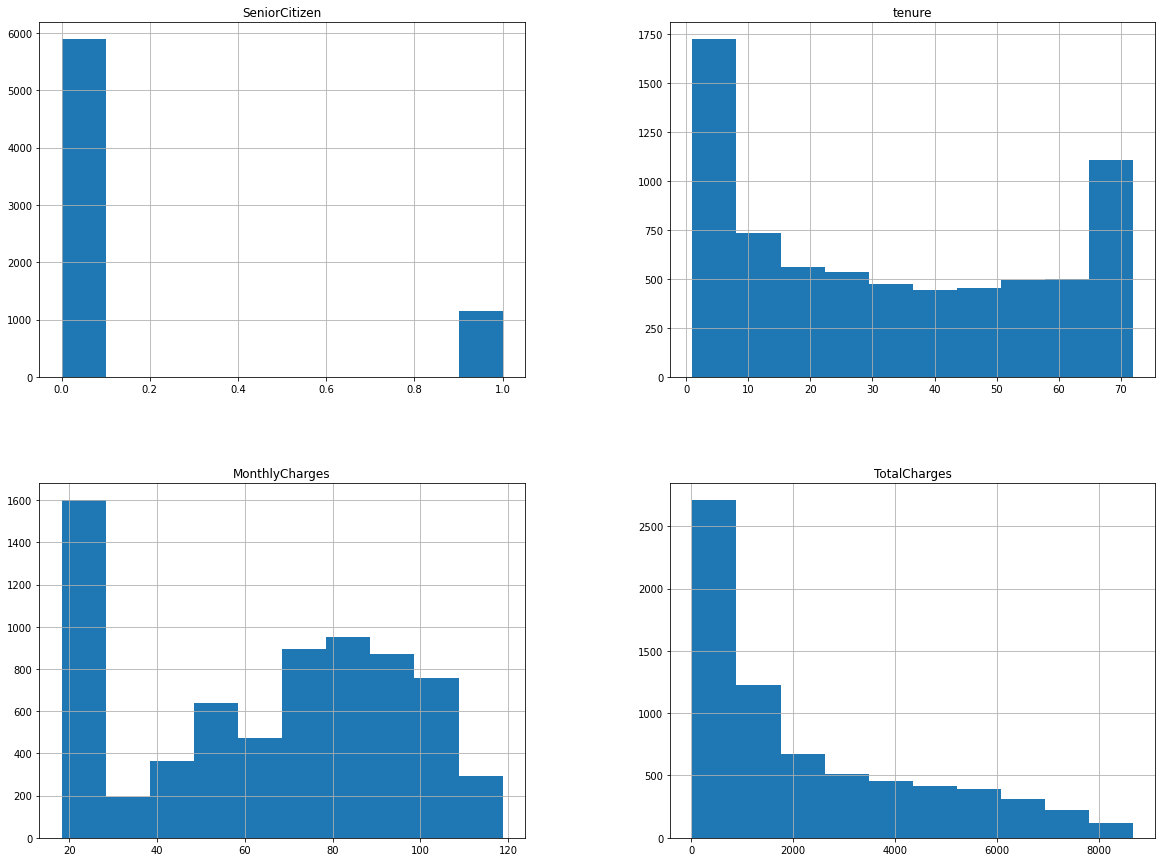

In [14]:
#For know the distribution of data numerical in dataset
df.hist()
plt.gcf().set_size_inches(20, 15)
plt.show()

In this dataset only have 3 column catagorical, and all distribution is skew

In [15]:
# to separate beetwen numerical and categorical data

num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=object).columns.tolist()

In [16]:
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

This dataset have 17 column for catagorical 

In [17]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

And have 4 column for numerical 

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Here it can be seen that there is information on numerical labels, judging from the data above, it can be seen that some data have outliers


In [19]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> To see the cardinality

In [20]:

for var in cat_col:
    
    print(var, ' berisi ', len(df[var].unique()), ' labels')

customerID  berisi  7032  labels
gender  berisi  2  labels
Partner  berisi  2  labels
Dependents  berisi  2  labels
PhoneService  berisi  2  labels
MultipleLines  berisi  3  labels
InternetService  berisi  3  labels
OnlineSecurity  berisi  3  labels
OnlineBackup  berisi  3  labels
DeviceProtection  berisi  3  labels
TechSupport  berisi  3  labels
StreamingTV  berisi  3  labels
StreamingMovies  berisi  3  labels
Contract  berisi  3  labels
PaperlessBilling  berisi  2  labels
PaymentMethod  berisi  4  labels
Churn  berisi  2  labels


I think the customerID will to drop, cause customerID have big cardinality and I don't use that

In [21]:
#Drop column customerID
df = df.drop(['customerID'], axis=1)

In [22]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Already to drop that column

In [23]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=object).columns.tolist()

In [24]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Already remove that

> Want to know distribution of target label

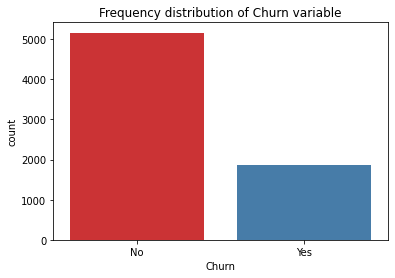

In [25]:
# pie chart
trace = go.Pie(labels = ['No','Yes'],
               values = df['Churn'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=[ 'DeepPink', 'DodgerBlue'], line=dict(color='#000000', width=1.5)))


layout = dict(title = 'Persentase Churn')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#bar chart
test =sns.countplot(x="Churn", data=df, palette="Set1")
test.set_title("Frequency distribution of Churn variable")

plt.show()

Here it can be seen that 73.4% in the `Churn` column is value no while 26.6% is value yes

And than, I want to know distribution of numerical data in this data set

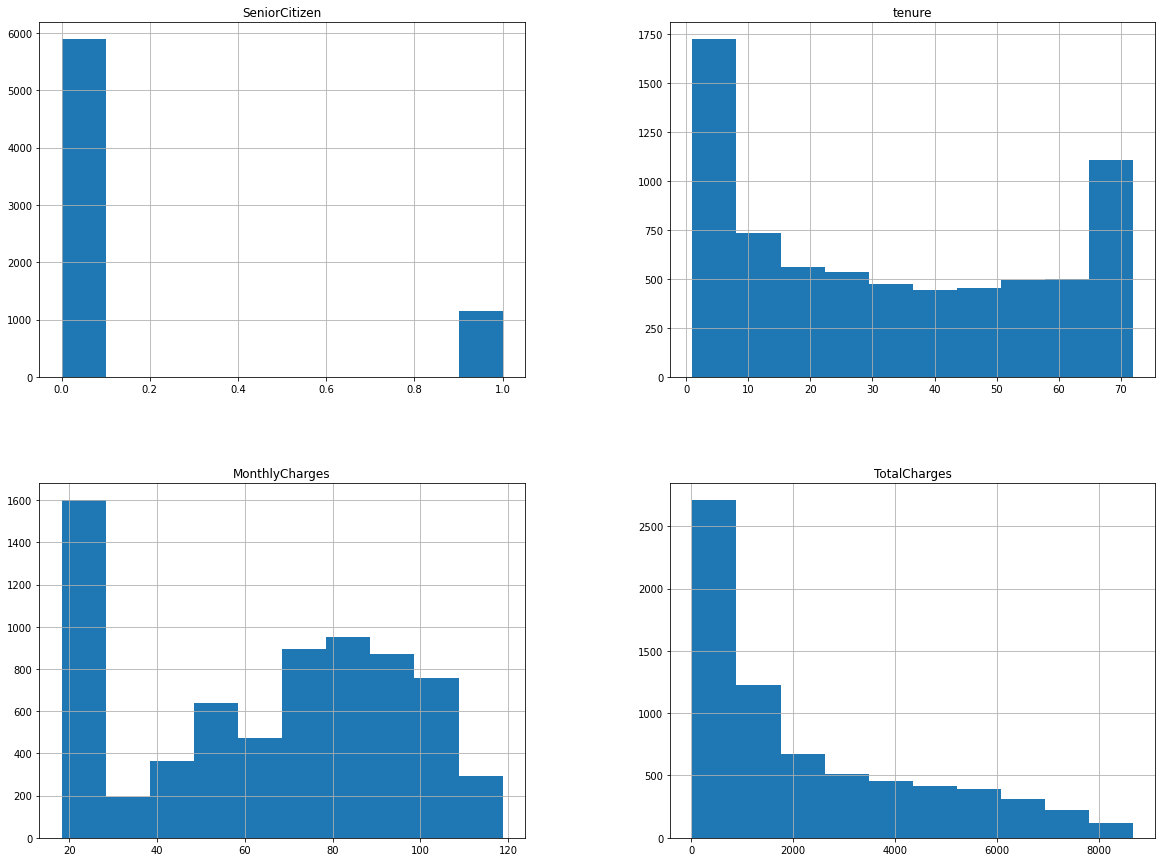

In [26]:
#To know the distribution of data numerical in dataset
df.hist()
plt.gcf().set_size_inches(20, 15)
plt.show()

For that information, we know that numerical column all skewed

> Want to know distribution data for catagorical column to target

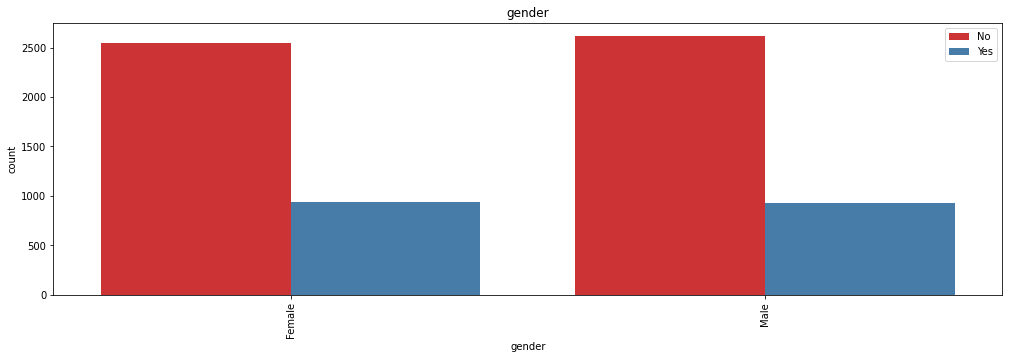

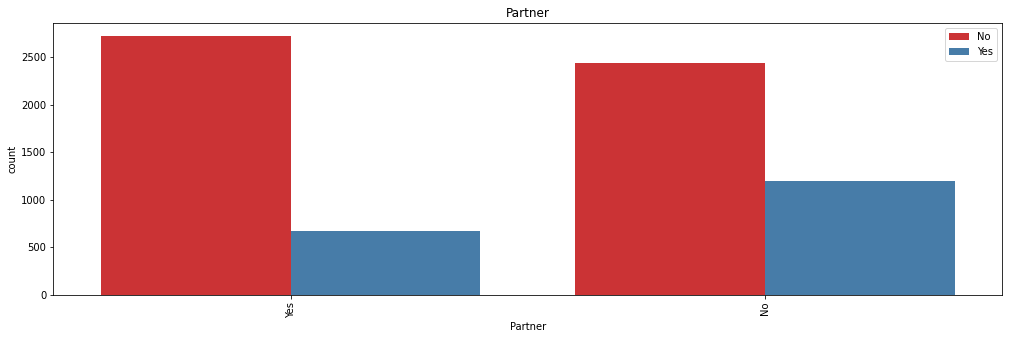

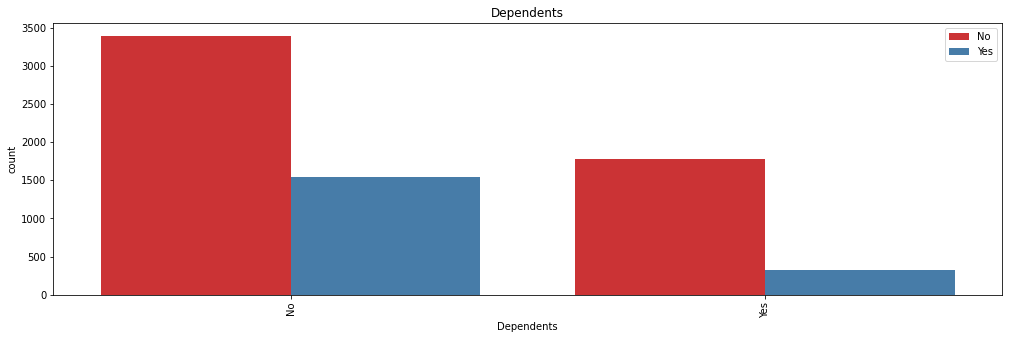

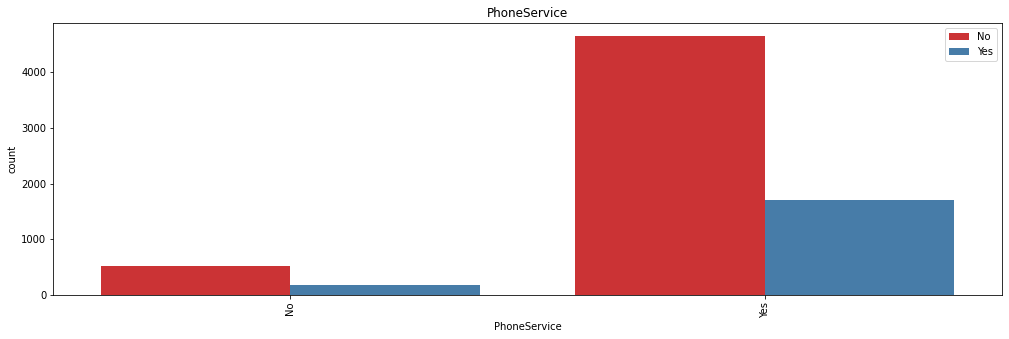

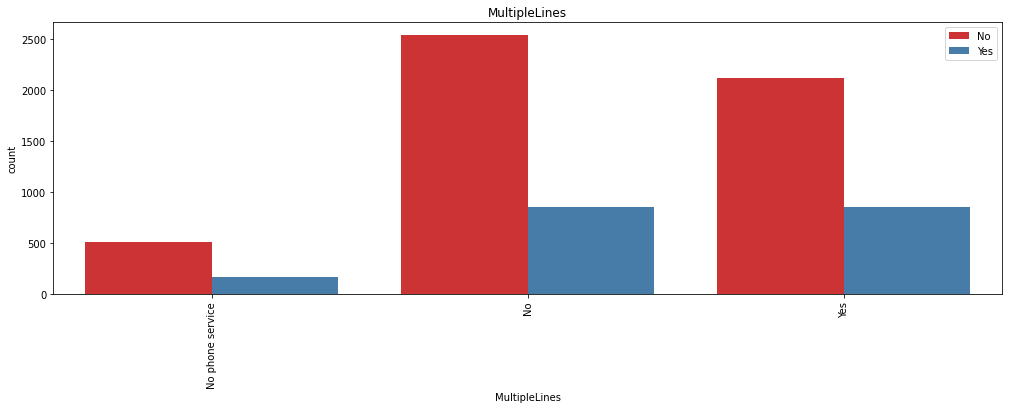

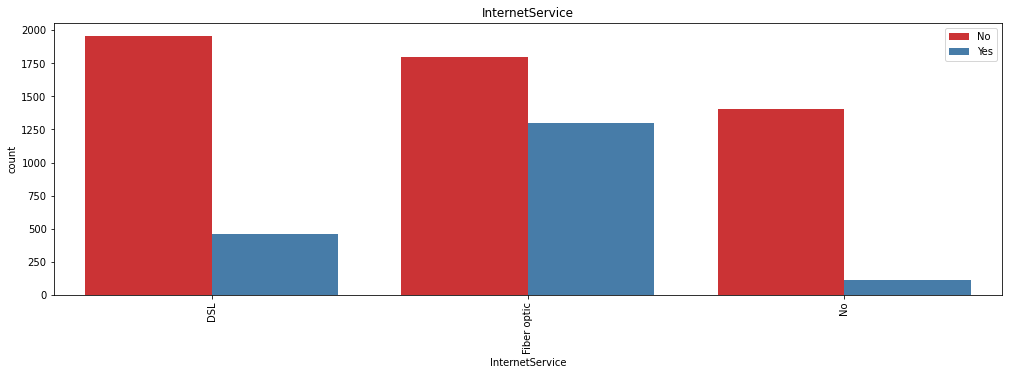

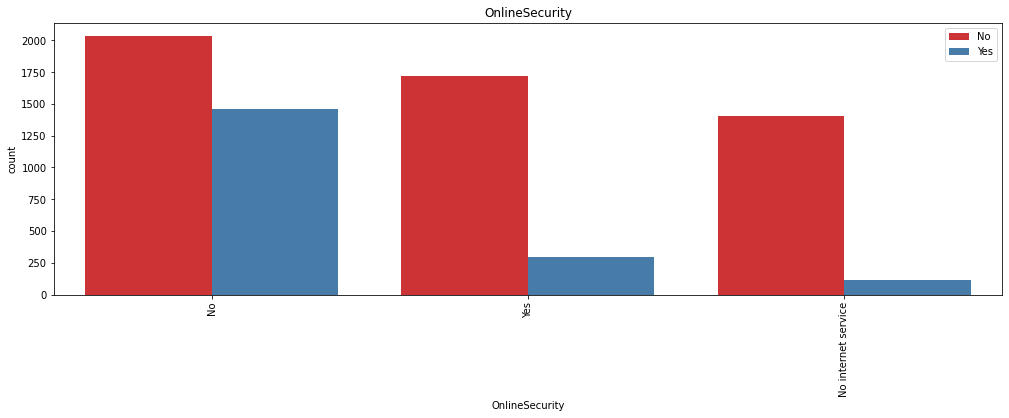

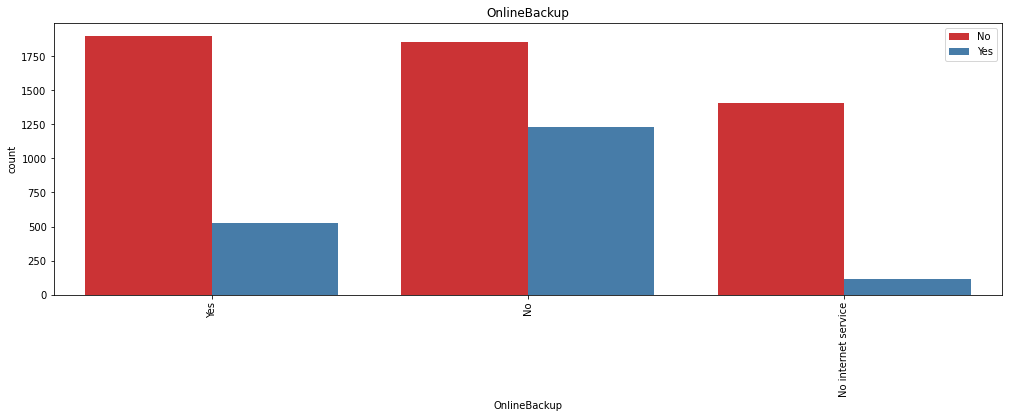

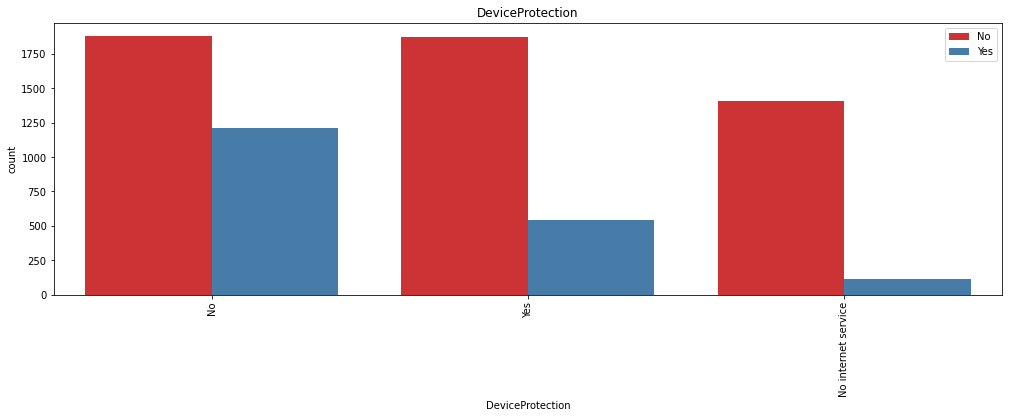

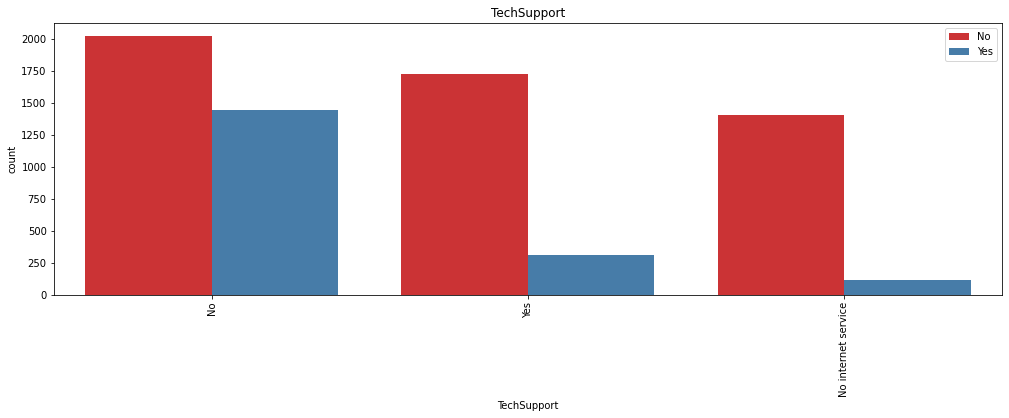

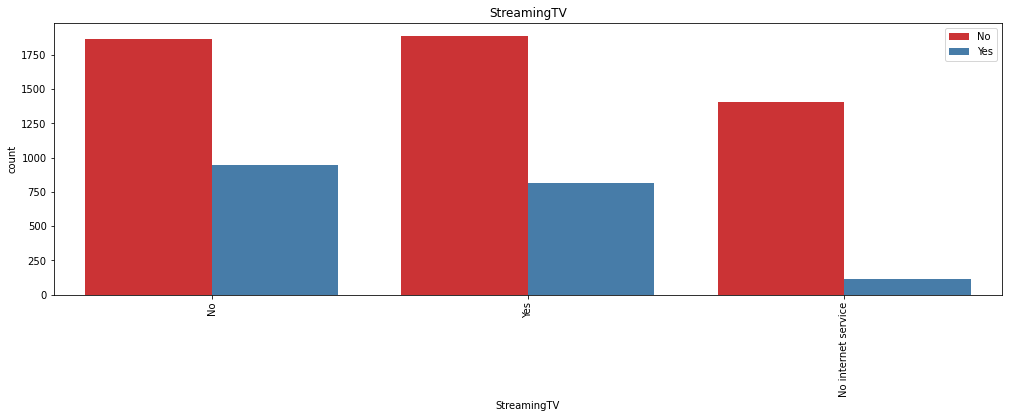

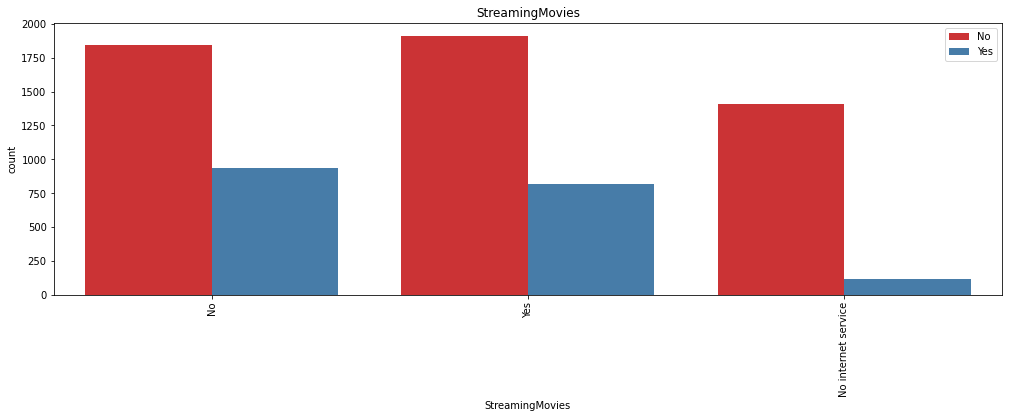

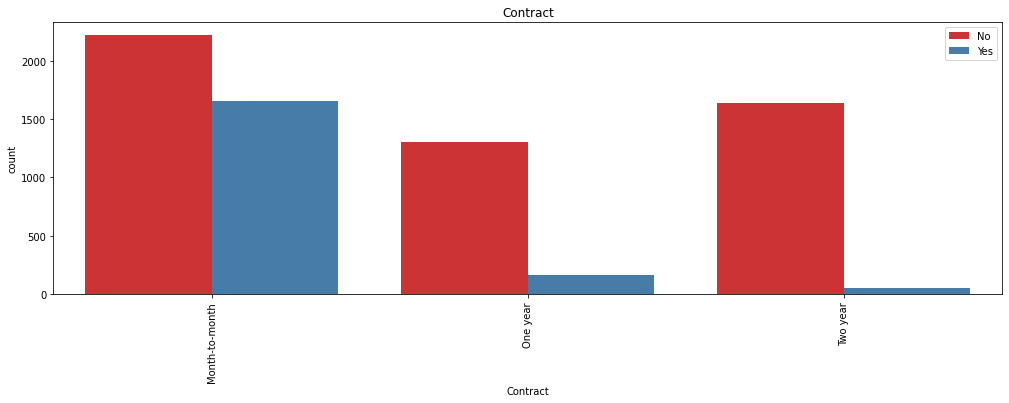

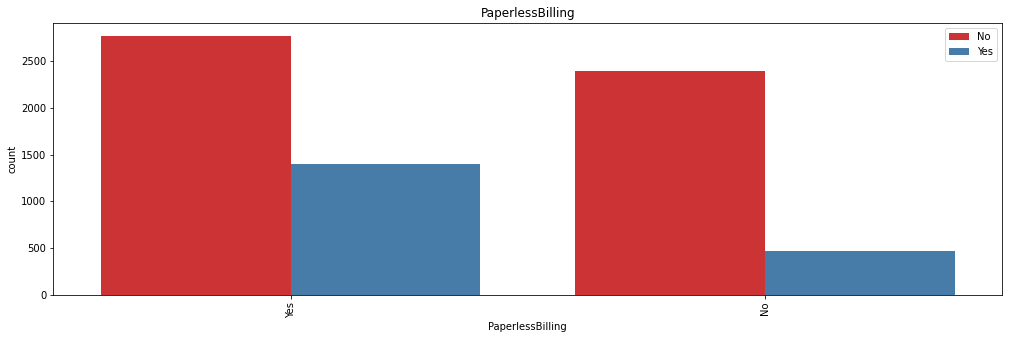

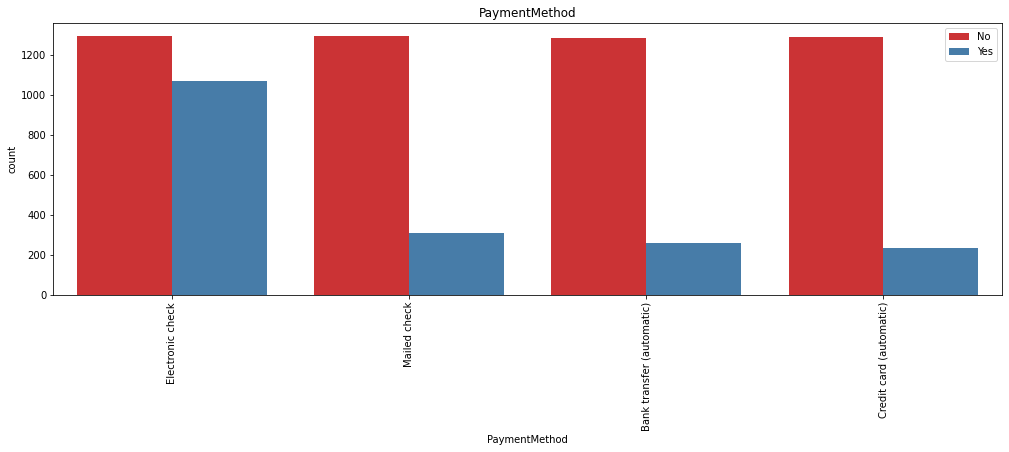

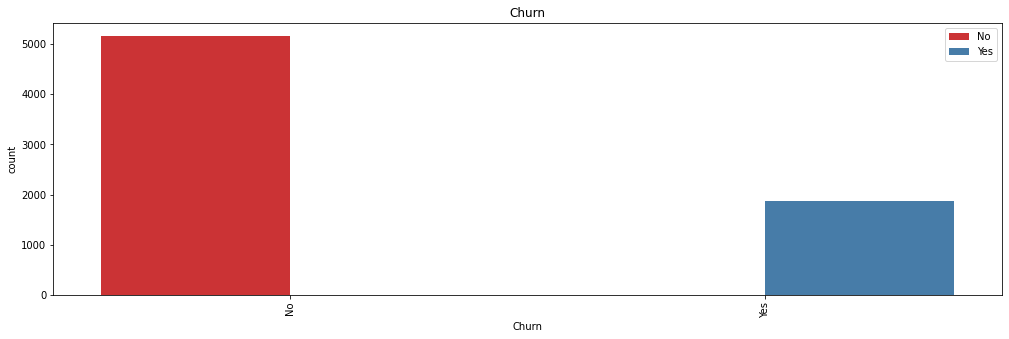

In [27]:
for col in cat_col:
    plt.figure(figsize=(17,5))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set1")
    plt.title(col)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

Thats all for distribusion data for catagorical column to Target we know that:
- For gender column: for column `Churn` value no it is dominated by Male, indicating that males are more likely to don't leave services than females
- For Partner Column : For column `Churn` value no, it is dominated by those who have partners, it means those who have partners don't leave the service more often than those who don't have partners
- For Dependants Column : For column `Churn` value no, dominated by those who don't have dependents, it means that many people who don't  have dependents don't leave the service compared to those who have dependents
- For PhoneService Column: For column `Churn` value no, dominated by those who have PhoneService, That means many people who have PhoneService don't leave the service
- For MultipleLines Column: For column `Churn` value no, dominated by those who don't have MultipleLines, that means many people who don't have MultipleLines don't leave the service
- For Internet Service Column: For column `Churn` value no, dominated by Using DSL as an internet service, it means many people who use DSL don't leave the service
- For Online Security Column: For column `Churn` value no, dominated by those who don't use online security, it means that many people who don't use online security don't leave the service
- For Online Backup Column: For column `Churn` value no, dominated by those who have Online Backup , it means many people who have OnlineBackup don't leave the service
- For Device Protection Column: For column `Churn` value no, dominated by those who  don't have Device Protection , that means many people who don't have Device Protection don't leave the service
- For Tech Support Column: For column `Churn` value no, dominated by those who  don't have Tech Support , that means many people who  don't have TechSupport  don't leave the service
- For Streaming TV Column: For column `Churn` value no, dominated by those who have streaming TV services, that means many people who have streaming TV services don't leave the service
- For Streaming Movies Column: For column `Churn` value no, dominated by those who have Streaming Movies services, that means many people who have movie streaming services don't leave the service
- For Contract Column: For column `Churn` value no, dominated by those who have Contracts for Month-to-month , that means many people who have contracts Month-to-month do not leave the service
- For Paperless Billing Column: For column `Churn` value no, dominated by those who have Paperless Billing , meaning that many people who have Pepperless Billing do not leave the service



> Feature Important 

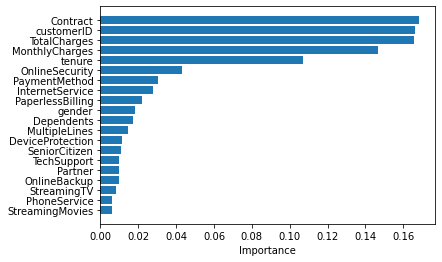

In [28]:

df_copy['Churn'] = df_copy['Churn'] == 'Yes' #For change the churn to boolean

for col in df_copy.columns:                     #Looping for change data type
    if df_copy[col].dtype == 'object':
        df_copy[col] = df_copy[col].astype('category').cat.codes

#Use DecisionTreeClassifier for feature important
tree = DecisionTreeClassifier(random_state=20)
tree.fit(df_copy.drop(['Churn'], axis=1), df_copy['Churn'])
_result = pd.DataFrame(tree.feature_importances_, index=df_copy.drop(['Churn'], axis=1).columns, columns=['Importance']).sort_values('Importance')
plt.barh(_result.index, _result['Importance'])
plt.xlabel('Importance');

Here it can be seen that the important features of the dataset are:
1. TotalCharges
2. Monthly Charges
3. Contract
4. Tanure
5. Online Security
  
This time I only used 5 features to be included in the model

## Data Preprocessing
> This section contains the process of preparing data for the model training process, such as dividing the data into train-dev-test, data transformation (normalization, encoding, etc.), and other necessary processes.

I want drop another column except 5 feature importent

In [29]:
#To droping another colomn
df_fi = df.drop(['PhoneService','OnlineBackup','StreamingMovies','StreamingTV','Partner','SeniorCitizen','TechSupport','DeviceProtection','PaperlessBilling','Dependents','MultipleLines','gender','InternetService','PaymentMethod'], axis=1)
df_fi.head()

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,29.85,29.85,No
1,34,Yes,One year,56.95,1889.50,No
2,2,Yes,Month-to-month,53.85,108.15,Yes
3,45,Yes,One year,42.30,1840.75,No
4,2,No,Month-to-month,70.70,151.65,Yes


That's dataset would be use in this case

In [30]:
df_fi.head()

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,29.85,29.85,No
1,34,Yes,One year,56.95,1889.50,No
2,2,Yes,Month-to-month,53.85,108.15,Yes
3,45,Yes,One year,42.30,1840.75,No
4,2,No,Month-to-month,70.70,151.65,Yes


Kemudian membuat data inferencenya

## Spilliting DataSet

In [31]:
#To Separate data X and Y (Target)
X = df_fi.drop(['Churn'], axis=1)
y = df_fi['Churn'] == 'Yes' #For change the churn to boolean
X

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,1,No,Month-to-month,29.85,29.85
1,34,Yes,One year,56.95,1889.50
2,2,Yes,Month-to-month,53.85,108.15
3,45,Yes,One year,42.30,1840.75
4,2,No,Month-to-month,70.70,151.65
...,...,...,...,...,...
7038,24,Yes,One year,84.80,1990.50
7039,72,No,One year,103.20,7362.90
7040,11,Yes,Month-to-month,29.60,346.45
7041,4,No,Month-to-month,74.40,306.60


In [32]:
y

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7032, dtype: bool

In [33]:
#To separate data X_train and X_val
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=20)
#To separate data X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=20)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,  X_val.shape, y_val.shape

((5062, 5), (5062,), (563, 5), (563,), (1407, 5), (1407,))

Because the target have imbalance data, we must to Oversampling, Let's cekidot!

In [35]:
#Do oversampling wiht imbalance dataset
n_pos = y_train.sum()
n_pos = y_train.sum()

sampler = RandomOverSampler(sampling_strategy={1: n_pos * 2})
X_train, y_train = sampler.fit_resample(X_train, y_train)
y_train.value_counts()

False    3720
True     2684
Name: Churn, dtype: int64

I use that strategy because the formula is \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class after resampling and N_{M} is the number of samples in the majority class

In [36]:
#Give Weights to the data
n_pos = y_train.sum()
n_neg = y_train.shape[0] - n_pos
total = n_pos + n_neg

class_weights = {0: (1 / n_neg) * (total / 2.0), 1: (1 / n_pos) * (total / 2.0)}
class_weights

{0: 0.860752688172043, 1: 1.1929955290611027}

After that I want to separate the X_train to numerical column and catagorical column

In [37]:
#Seperate data X_train to numerical and categorical
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['OnlineSecurity', 'Contract']


In [38]:
#To separate data X_train and X_test to numerical and categorical
X_train_cat = X_train[cat_cols]
X_train_num = X_train.drop(columns=cat_cols)

X_test_cat = X_test[cat_cols]
X_test_num = X_test.drop(columns=cat_cols)

## Handling Outlier

In [39]:
distribusion_data = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
distribusion_data.reset_index(drop=True, inplace=True)

distribusion_data['status'] = np.where(distribusion_data['skew'].abs()>0.5, 'Skewed', 'Normal')
distribusion_data

,columns,skew,status
0,tenure,0.415934,Normal
1,MonthlyCharges,-0.336750,Normal
2,TotalCharges,1.080735,Skewed


Here it can be seen that there are 2 columns that are normally distributed and 1 column is a skewed column

Then, create a function for outlier detection
- If skewed then use IQR as his detection
- If Normal Distribution then use Z-score as detection

In [40]:
# Outliers Detection Function
# To know Outlier with Z-score 
# Make dev function Z-score

def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

In [41]:
# Outliers Detection Function
# To know outlier with IQR
# Make dev function IQR

def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary_skew = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_skew = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_skew, lower_boundary_skew
    

In [42]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if distribusion_data['status'].loc[(distribusion_data['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1


Batas lower dan upper untuk tenure:(-43.45663441515432, 102.2786206737427)
Batas lower dan upper untuk MonthlyCharges:(-20.86629329657424, 154.59894476440684)
Batas lower dan upper untuk TotalCharges:(-4328.1, 8059.5)


In [43]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_trimmed = X_train.loc[~outliers[k]]
    distribusion_data.loc[i,'trimmed_row'] = df.shape[0] - X_train_trimmed.shape[0]
    distribusion_data.loc[i,'percentage'] = np.round(100-(X_train_trimmed.shape[0]/df.shape[0]*100), 2)
    distribusion_data.loc[i,'action'] = np.where(distribusion_data.loc[i,'percentage']>15, 'Keep', 
                                        np.where(distribusion_data.loc[i,'percentage']>5, 'Capping', 'Trim'))
distribusion_data

,columns,skew,status,trimmed_row,percentage,action
0,tenure,0.415934,Normal,628.0,8.93,Capping
1,MonthlyCharges,-0.336750,Normal,628.0,8.93,Capping
2,TotalCharges,1.080735,Skewed,683.0,9.71,Capping


Then we can handle that with winsorizer for capping status

In [44]:
print('X_train - Before Handling:', X_train.shape)
out_winsorizer_skew= Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['tenure','MonthlyCharges','TotalCharges'], missing_values='ignore')
out_winsorizer_skew.fit(X_train)

X_train= out_winsorizer_skew.transform(X_train)
print('X_train - After Handling:', X_train.shape)

X_train - Before Handling: (6404, 5)
X_train - After Handling: (6404, 5)


And we already to capping the outlier

## Feature Scaling

I use Pipeline for Feature Scaling

## Feature Encoding

I use Pipeline for Feature Encoding

## Pipeline For Feature Scaling dan Encodeing

In this case I use Feature Scaling and Encoding with Pipeline

In [45]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=object).columns.tolist()

X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [46]:
X_train

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,3.0,No internet service,Month-to-month,20.85,60.65
1,11.0,No,Month-to-month,75.20,775.30
2,67.0,Yes,One year,60.05,3994.05
3,23.0,Yes,Two year,91.10,2198.30
4,64.0,No,Two year,68.30,4378.80
...,...,...,...,...,...
6399,6.0,No,Month-to-month,95.75,573.75
6400,39.0,No,Month-to-month,95.65,3759.05
6401,5.0,No,Month-to-month,96.25,512.45
6402,9.0,No,Month-to-month,75.75,655.90


In [47]:
num_pipeline = make_pipeline(
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])


In [48]:
train_pipeline = data_pipeline.fit_transform(X_train), y_train
val_pipeline = data_pipeline.transform(X_val), y_val
test_pipeline = data_pipeline.transform(X_test), y_test

Here I do:
- Scaler with standart scaler
- One Hot Endocer for encode catagorical column 
  
I will save that data to tensorflow 


In [49]:
#saving data into tf.data
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices(train_pipeline).shuffle(10000).batch(128)
val_data = tf.data.Dataset.from_tensor_slices(val_pipeline).batch(128)
test_data = tf.data.Dataset.from_tensor_slices(test_pipeline).batch(128)

## Model Defination
This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

In [50]:
#For Sequential Model
model = Sequential()
model.add(Dense(8, activation= 'relu',input_shape=(9,))) # first hidden layer 8 neuron
model.add(Dropout(0.2))
model.add(Dense(4, activation= 'relu')) #second hidden layer 4 neuron
model.add(Dropout(0.2))
model.add(Dense(2, activation= 'relu')) #third hidden layer 2 neuron
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [52]:
#Compile the model
model.compile(loss='binary_crossentropy', #binary_crossentropy for binary classification
              optimizer= 'adam', #adam for optimization and learning rate with 0.15
              metrics=['accuracy']) #defaultny matrics loss

## Model Training
>The cells in this section only contain the code to train the model and the resulting output. Do the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

In [53]:
history = model.fit(train_data, epochs=100, validation_data=val_data)

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 0.6879 - accuracy: 0.5729 - val_loss: 0.6696 - val_accuracy: 0.7406
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5809 - val_loss: 0.6384 - val_accuracy: 0.7406
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.5809 - val_loss: 0.5797 - val_accuracy: 0.7406
Epoch 4/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.5809 - val_loss: 0.5321 - val_accuracy: 0.7406
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.5809 - val_loss: 0.5104 - val_accuracy: 0.7406
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.5809 - val_loss: 0.4985 - val_accuracy: 0.7406
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.6527 - val_loss: 0.4908 - val_accuracy: 0.7868
Epoch 8/100
5

## Model Evaluation
In this section, an evaluation of the model is carried out which must show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.

In [54]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.687901,0.572923,0.669646,0.740583
1,0.675347,0.580887,0.638384,0.740583
2,0.657217,0.580887,0.579676,0.740583
3,0.631073,0.580887,0.532142,0.740583
4,0.616168,0.580887,0.510435,0.740583


<AxesSubplot:>

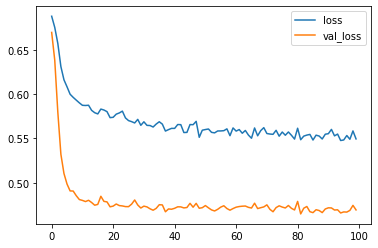

In [55]:
metrics[['loss','val_loss']].plot()

I think it's overfit

<AxesSubplot:>

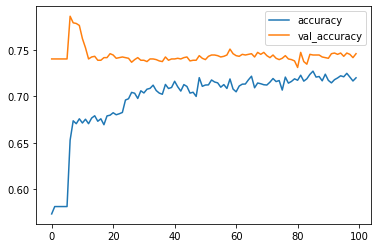

In [56]:
metrics[['accuracy','val_accuracy']].plot()

In [57]:
y_pred = model.predict(test_data) #hasilnya akan probabilitas
y_pred= np.where(y_pred > 0.5, 1, 0) # Binary only kalau multiclass berbeda lagi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.74      0.80       401
        True       0.53      0.72      0.61       162

    accuracy                           0.74       563
   macro avg       0.70      0.73      0.71       563
weighted avg       0.77      0.74      0.75       563



We can get :
- For class false f1-score accuracy is 84%
- For the True class, the F1-score accuracy is 63%
- And accuracy model 75%


In [58]:
#For Functional Model
#Functional Model without Dropout
data_in = Input(shape=(9,))
hidden_1= Dense(8, activation='relu')(data_in)  #first hidden layer 8 neuron
hidden_2= Dense(4, activation='relu')(hidden_1) #second hidden layer 4 neuron
hidden_3= Dense(2, activation='relu')(hidden_2) #third hidden layer 2 neuron
out = Dense(1, activation='sigmoid')(hidden_3)

# Jadikan 1 Kesatuan
model2= Model(inputs=data_in, outputs=out)


In [59]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 80        
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [60]:
#Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy']) #defaultny matrics loss

history = model2.fit(train_data, epochs=300, validation_data=val_data)

Epoch 1/300
51/51 [==============================] - 1s 4ms/step - loss: 0.6532 - accuracy: 0.5809 - val_loss: 0.5965 - val_accuracy: 0.7406
Epoch 2/300
51/51 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.5809 - val_loss: 0.5568 - val_accuracy: 0.7406
Epoch 3/300
51/51 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6015 - val_loss: 0.5284 - val_accuracy: 0.7726
Epoch 4/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7024 - val_loss: 0.4981 - val_accuracy: 0.7783
Epoch 5/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7197 - val_loss: 0.4789 - val_accuracy: 0.7761
Epoch 6/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7275 - val_loss: 0.4696 - val_accuracy: 0.7662
Epoch 7/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7413 - val_loss: 0.4647 - val_accuracy: 0.7562
Epoch 8/300
5

In [61]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.653161,0.580887,0.596462,0.740583
1,0.625349,0.580887,0.556818,0.740583
2,0.604693,0.601499,0.528438,0.772566
3,0.583129,0.702374,0.498136,0.778252
4,0.564705,0.719706,0.478869,0.776119


<AxesSubplot:>

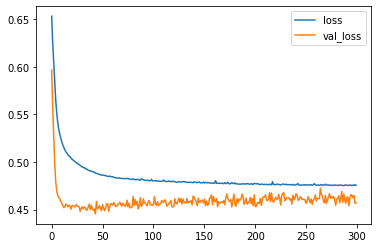

In [62]:
metrics[['loss','val_loss']].plot()

It can be seen that the model is slightly overfitting

<AxesSubplot:>

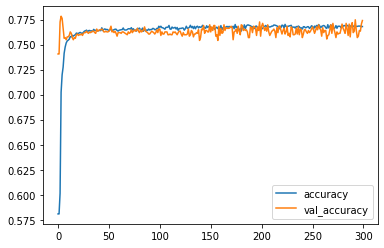

In [63]:
metrics[['accuracy','val_accuracy']].plot()

In [64]:
y_pred = model2.predict(test_data) #hasilnya akan probabilitas
y_pred= np.where(y_pred > 0.5, 1, 0) # Binary only kalau multiclass berbeda lagi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.79      0.82       401
        True       0.56      0.67      0.61       162

    accuracy                           0.75       563
   macro avg       0.71      0.73      0.71       563
weighted avg       0.77      0.75      0.76       563



It can be seen that when the dropout is removed, there is an improvement,because the overfitting is reduced:
- For class false f1-score accuracy is 84%
- For the True class, the F1-score accuracy is 63%
- And accuracy model 77%
  
But I want to practice again with another model

In [65]:
#In This case I will reduce 1 hidden layer 
model3 = Sequential()

model3.add(Dense(4, activation= 'relu',input_shape=(9,))) # first hidden layer 4 neuron
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', #binary_crossentropy for binary classification
              optimizer= 'adam', #adam for optimization and learning rate with 0.15
              metrics=['accuracy']) #defaultny matrics loss



In [66]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 40        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model3.fit(train_data, epochs=300, validation_data=val_data) #Running with 350 epcohs

Epoch 1/300
51/51 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.4502 - val_loss: 0.6586 - val_accuracy: 0.5451
Epoch 2/300
51/51 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.5689 - val_loss: 0.5942 - val_accuracy: 0.6795
Epoch 3/300
51/51 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6786 - val_loss: 0.5517 - val_accuracy: 0.7157
Epoch 4/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.7239 - val_loss: 0.5203 - val_accuracy: 0.7385
Epoch 5/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7327 - val_loss: 0.4997 - val_accuracy: 0.7399
Epoch 6/300
51/51 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7366 - val_loss: 0.4868 - val_accuracy: 0.7434
Epoch 7/300
51/51 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7402 - val_loss: 0.4829 - val_accuracy: 0.7399
Epoch 8/300
5

In [68]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.720791,0.450187,0.658605,0.545132
1,0.651696,0.568863,0.594238,0.679460
2,0.605307,0.678638,0.551690,0.715707
3,0.572601,0.723923,0.520253,0.738451
4,0.548916,0.732667,0.499700,0.739872


<AxesSubplot:>

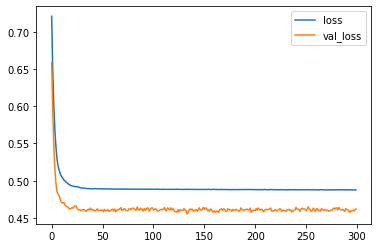

In [69]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

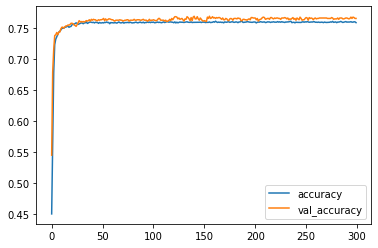

In [70]:
metrics[['accuracy','val_accuracy']].plot()

In [71]:
y_pred = model.predict(test_data) #hasilnya akan probabilitas
y_pred= np.where(y_pred > 0.5, 1, 0) # Binary only kalau multiclass berbeda lagi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.74      0.80       401
        True       0.53      0.72      0.61       162

    accuracy                           0.74       563
   macro avg       0.70      0.73      0.71       563
weighted avg       0.77      0.74      0.75       563



We get : 
- For class false f1-score accuracy is 82%
- For the True class, the F1-score accuracy is 63%
- And accuracy model 75%


## Conclusion
The best model with better overfitting is on model2,with:
- 3 Hidden Layer, first hidden layer have 8 Neuron, Second Hidden layer have 4 Neuron, and Third hidden layer have 2 Neuron
- Activation function in all hidden layer are `relu` and for out layer is `sigmoid`
- Use Binary Crossentropy for loss
- optimizer use adam
And for scoring:
- For class false f1-score accuracy is 84%
- For the True class, the F1-score accuracy is 63%
- And accuracy model 77%

## Model Saving
By looking at the results of the model evaluation, choose the best model to save. This best model will be reused in deploying Heroku.

In [72]:
#saving prepocessing data

import pickle
f= open('preprocesing.pkl', 'wb') #wb = write binary, rb = read binary
pickle.dump(data_pipeline, f)
f.close()

In [73]:
# simpan model
from tensorflow.keras.models import load_model,save_model
model2.save('modell.h5')

## Model Inference 

In [74]:
df_fi

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,29.85,29.85,No
1,34,Yes,One year,56.95,1889.50,No
2,2,Yes,Month-to-month,53.85,108.15,Yes
3,45,Yes,One year,42.30,1840.75,No
4,2,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,24,Yes,One year,84.80,1990.50,No
7039,72,No,One year,103.20,7362.90,No
7040,11,Yes,Month-to-month,29.60,346.45,No
7041,4,No,Month-to-month,74.40,306.60,Yes


In [75]:
df_inf= pd.DataFrame([{'tenure': 48, 'OnlineSecurity': 'No', 'Contract': 'One year', 'MonthlyCharges': 100, 'TotalCharges': 1998}])

In [76]:
df_inf

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
0,48,No,One year,100,1998


In [77]:
inf= data_pipeline.transform(df_inf)
inf.shape

(1, 9)

In [78]:
# For Inference 
y_pred = model.predict(inf)
y_pred= np.where (y_pred > 0.5, 1,0)
y_pred

array([[0]])

In [79]:
X_test

,tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges
3852,1,No internet service,Month-to-month,19.65,19.65
3175,17,No,Month-to-month,81.50,1329.20
3198,40,No,One year,106.00,4178.65
3112,72,Yes,Two year,100.55,7325.10
3015,59,Yes,Two year,86.75,5186.00
...,...,...,...,...,...
1951,14,No,Month-to-month,50.20,668.85
4196,70,No internet service,Two year,24.05,1764.75
2384,48,No,Month-to-month,91.05,4370.75
5149,62,No internet service,Two year,19.20,1123.65


In [91]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [80]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Overall Analysis

> Because it takes up future importance, in this case it uses 5 features, that is:
- tenure
- OnlineSecurity
- Contract
- MonthlyCharges
- TotalCharges
> For EDA:
- For gender column: for column `Churn` value no it is dominated by Male, indicating that males are more likely to don't leave services than females
- For Partner Column : For column `Churn` value no, it is dominated by those who have partners, it means those who have partners don't leave the service more often than those who don't have partners
- For Dependants Column : For column `Churn` value no, dominated by those who don't have dependents, it means that many people who don't  have dependents don't leave the service compared to those who have dependents
- For PhoneService Column: For column `Churn` value no, dominated by those who have PhoneService, That means many people who have PhoneService don't leave the service
- For MultipleLines Column: For column `Churn` value no, dominated by those who don't have MultipleLines, that means many people who don't have MultipleLines don't leave the service
- For Internet Service Column: For column `Churn` value no, dominated by Using DSL as an internet service, it means many people who use DSL don't leave the service
- For Online Security Column: For column `Churn` value no, dominated by those who don't use online security, it means that many people who don't use online security don't leave the service
- For Online Backup Column: For column `Churn` value no, dominated by those who have Online Backup , it means many people who have OnlineBackup don't leave the service
- For Device Protection Column: For column `Churn` value no, dominated by those who  don't have Device Protection , that means many people who don't have Device Protection don't leave the service
- For Tech Support Column: For column `Churn` value no, dominated by those who  don't have Tech Support , that means many people who  don't have TechSupport  don't leave the service
- For Streaming TV Column: For column `Churn` value no, dominated by those who have streaming TV services, that means many people who have streaming TV services don't leave the service
- For Streaming Movies Column: For column `Churn` value no, dominated by those who have Streaming Movies services, that means many people who have movie streaming services don't leave the service
- For Contract Column: For column `Churn` value no, dominated by those who have Contracts for Month-to-month , that means many people who have contracts Month-to-month do not leave the service
- For Paperless Billing Column: For column `Churn` value no, dominated by those who have Paperless Billing , meaning that many people who have Pepperless Billing do not leave the service
> For Model :

The best model with better overfitting is on model2,with:
- 3 Hidden Layer, first hidden layer have 8 Neuron, Second Hidden layer have 4 Neuron, and Third hidden layer have 2 Neuron
- Activation function in all hidden layer are `relu` and for out layer is `sigmoid`
- Use Binary Crossentropy for loss
- optimizer use adam
And for scoring:
- For class false f1-score accuracy is 84%
- For the True class, the F1-score accuracy is 63%
- And accuracy model 77%